In [8]:
""" 
Author: Md Hasan
Date: 05-11-2023
"""

In [ ]:
# !pip install transformers
# !pip install datasets

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def get_dataset(dataset_name: str, split:str = 'train') -> pd.DataFrame:
    """Load dataset from HuggingFace Datasets Hub.
    Args:
        dataset_name (str): Name of the dataset to load.
        split (str): Name of the split to load.
    Returns:
        dataset (pandas.DataFrame): Pandas DataFrame containing the dataset.
    """
    dataset = load_dataset(dataset_name, split=split).to_pandas()
    return dataset


def get_label_map() -> dict:
    """Get label map for the TCFD recommendation dataset.
    Returns:
        label_map (dict): Dictionary mapping label indices to label names.
    """
    label_map = {0: 'none', 1: 'metrics', 2: 'strategy', 3: 'risk', 4: 'governance'}
    return label_map

In [17]:

dataset_name  = "climatebert/tcfd_recommendations"
train_dataset = get_dataset(dataset_name, split="train")
test_dataset  = get_dataset(dataset_name, split="test")

label_map = get_label_map()


Using custom data configuration climatebert--tcfd_recommendations-8f7123f770abbd61
Reusing dataset parquet (/home/azureuser/.cache/huggingface/datasets/climatebert___parquet/climatebert--tcfd_recommendations-8f7123f770abbd61/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)
Using custom data configuration climatebert--tcfd_recommendations-8f7123f770abbd61
Reusing dataset parquet (/home/azureuser/.cache/huggingface/datasets/climatebert___parquet/climatebert--tcfd_recommendations-8f7123f770abbd61/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


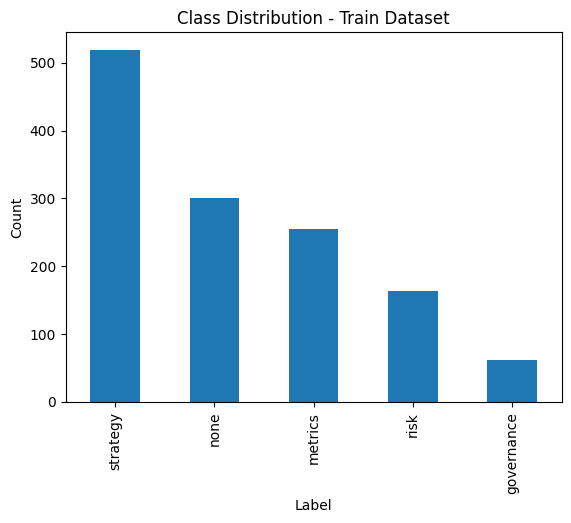

In [18]:
# Plot class distribution
train_dataset['label_name'] = train_dataset['label'].map(label_map)
train_dataset['label_name'].value_counts().plot(kind='bar')
plt.title('Class Distribution - Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Basic Recommandations model using TF-IDF for TCFD recommandations dataset

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [20]:

###########################################
# 1. Load and preprocess the text data
###########################################
train_dataset = get_dataset("climatebert/tcfd_recommendations", split="train")
test_dataset = get_dataset("climatebert/tcfd_recommendations", split="test")
label_map = get_label_map()


###########################################
# 2. Preprocess the text data
###########################################
train_texts = train_dataset['text'].tolist()
train_labels = train_dataset['label'].tolist()
test_texts = test_dataset['text'].tolist()
test_labels = test_dataset['label'].tolist()
# Split the dataset into train and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


###########################################
# 3. Create a TF-IDF vectorizer
###########################################
# Create a TF-IDF vectorizer and fit it on the train set
vectorizer = TfidfVectorizer()
vectorizer.fit(train_texts)


##########################################
# 4. Transform the train and test sets
###########################################
# Transform the train and test sets using the fitted vectorizer
train_vectors = vectorizer.transform(train_texts)
val_vectors = vectorizer.transform(val_texts)
test_vectors = vectorizer.transform(test_texts)

Using custom data configuration climatebert--tcfd_recommendations-8f7123f770abbd61
Reusing dataset parquet (/home/azureuser/.cache/huggingface/datasets/climatebert___parquet/climatebert--tcfd_recommendations-8f7123f770abbd61/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)
Using custom data configuration climatebert--tcfd_recommendations-8f7123f770abbd61
Reusing dataset parquet (/home/azureuser/.cache/huggingface/datasets/climatebert___parquet/climatebert--tcfd_recommendations-8f7123f770abbd61/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


              precision    recall  f1-score   support

        none       0.52      0.75      0.61        80
     metrics       0.62      0.69      0.65        49
    strategy       0.75      0.75      0.75       197
        risk       0.24      0.10      0.14        48
  governance       0.80      0.31      0.44        26

    accuracy                           0.64       400
   macro avg       0.58      0.52      0.52       400
weighted avg       0.63      0.64      0.62       400



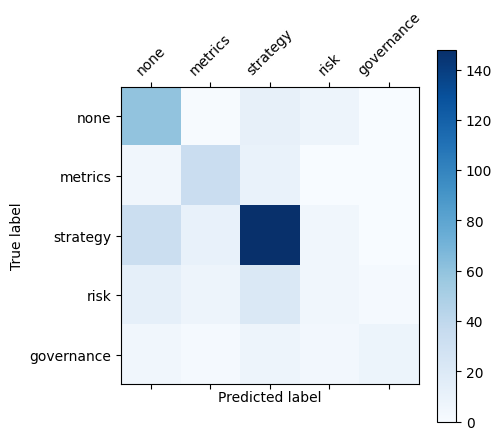

In [21]:
#########################################
# 5. Train and evaluate a classifier
###########################################
# Train a classifier on the transformed train set
classifier = LinearSVC()
classifier.fit(train_vectors, train_labels)

#########################################
# 6. Evaluate the classifier
###########################################
# Evaluate the classifier on the transformed test set
test_preds = classifier.predict(test_vectors)


#########################################
# 7. Visualize the evaluation results
###########################################

# Show the evaluation results and visualization

print(classification_report(test_labels, test_preds, target_names=label_map.values()))

cm = confusion_matrix(test_labels, test_preds)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(list(label_map.keys()), label_map.values(), rotation=45)
plt.yticks(list(label_map.keys()), label_map.values())
plt.show()